In [1]:
import torch

from torch import FloatTensor

from torch.nn import Module, Linear, ReLU, Tanh
from torch.autograd import Variable
from utils import build_data

from torch.nn import MSELoss
from torch.optim.sgd import SGD

import matplotlib.pyplot as plt

In [12]:
class Net(Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = Linear(2, 25)
        self.hidden2 = Linear(25, 25)
        self.hidden3 = Linear(25, 25)
        self.out = Linear(25, 2)
        
    def acc(self, predictions, target):
        correct = 0
        _, predicted = predictions.max(1)
        _, true = target.max(1)
        return (predicted == true).sum()/len(predictions)

    def forward(self, x):
        relu = ReLU()
        tanh = Tanh()
        x = relu(self.hidden(x))
        x = relu(self.hidden2(x))
        x = tanh(self.hidden3(x))
        x = self.out(x)
        return x
    
    def fit(self, num_epochs, x_train, y_train, x_validation, y_validation):
        history = dict(tr_loss=[], val_loss=[], tr_acc=[], val_acc=[])

        for epoch in range(num_epochs):
            running_loss = 0
            for i in range(1000): 
                # Convert torch tensor to Variable
                image = Variable(x_train[i].view(-1, 2))
                label = Variable(y_train[i])

                # Forward + Backward + Optimize
                optimizer.zero_grad()  # zero the gradient buffer
                outputs = model.forward(image)
                loss = criterion(outputs, label)
                loss.backward()
                optimizer.step()
                running_loss += loss.data[0]

            history['tr_loss'].append(running_loss/1000)
            history['tr_acc'].append(self.acc(self.forward(Variable(x_train)).data, y_train))
            history['val_acc'].append(self.acc(self.forward(Variable(x_validation)).data, y_validation))
            history['val_loss'].append(criterion(self.forward(Variable(x_validation)), Variable(y_validation)).data[0])

            print('Loss at epoch {} : {}'.format(epoch + 1, history['tr_loss'][-1]))

        print('Training loss : {}'.format(history['tr_loss'][-1]))
        print('Training accuracy : {}'.format(history['tr_acc'][-1]))
        print('Validation accuracy : {}'.format(history['val_acc'][-1]))
        return history
    
    def predict(self, x):
        outputs = FloatTensor(-1, 2)
        for i in range(len(x)):
            image = Variable(x[i])
            output = self.forward(image)
            outputs = torch.cat((outputs, output.data.view(1, -1)), 0)
        return outputs

In [13]:
def prepare_standardplot(title, xlabel):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
    fig.suptitle(title)
    ax1.set_ylabel('MSE')
    ax1.set_xlabel(xlabel)
    ax2.set_ylabel('accuracy [% correct]')
    ax2.set_xlabel(xlabel)
    return fig, ax1, ax2

def finalize_standardplot(fig, ax1, ax2):
    ax1handles, ax1labels = ax1.get_legend_handles_labels()
    if len(ax1labels) > 0:
        ax1.legend(ax1handles, ax1labels)
    ax2handles, ax2labels = ax2.get_legend_handles_labels()
    if len(ax2labels) > 0:
        ax2.legend(ax2handles, ax2labels)
    fig.tight_layout()
    plt.subplots_adjust(top=0.9)

def plot_history(history, title):
    fig, ax1, ax2 = prepare_standardplot(title, 'epoch')
    ax1.plot(history['tr_loss'], label = "training")
    ax1.plot(history['val_loss'], label = "validation")
    ax2.plot(history['tr_acc'], label = "training")
    ax2.plot(history['val_acc'], label = "validation")
    finalize_standardplot(fig, ax1, ax2)
    return fig


In [14]:
x_train, y_train = build_data(1000)
x_validation, y_validation = build_data(1000)

In [19]:
model = Net()

# Loss and Optimizer
criterion = MSELoss()  
optimizer = SGD(model.parameters(), lr=0.01)  

num_epochs=40
batch_size=1

history = model.fit(num_epochs, x_train, y_train, x_validation, y_validation)

Loss at epoch 1 : 0.2560307604819536
Loss at epoch 2 : 0.2426223601102829
Loss at epoch 3 : 0.23279482677951455
Loss at epoch 4 : 0.21100420425426272
Loss at epoch 5 : 0.17040887772264438
Loss at epoch 6 : 0.12593212046878396
Loss at epoch 7 : 0.10242848129816093
Loss at epoch 8 : 0.09155827105185972
Loss at epoch 9 : 0.0859454008793773
Loss at epoch 10 : 0.0825598881059824
Loss at epoch 11 : 0.07936304677234944
Loss at epoch 12 : 0.07696050466918655
Loss at epoch 13 : 0.07541236826349995
Loss at epoch 14 : 0.074290509912059
Loss at epoch 15 : 0.0731399839540436
Loss at epoch 16 : 0.07175322154343848
Loss at epoch 17 : 0.07069753873159926
Loss at epoch 18 : 0.06979668712336297
Loss at epoch 19 : 0.06864299994652492
Loss at epoch 20 : 0.06779284610838487
Loss at epoch 21 : 0.06687441278292468
Loss at epoch 22 : 0.06600386766331895
Loss at epoch 23 : 0.06531681343669697
Loss at epoch 24 : 0.06426564665343597
Loss at epoch 25 : 0.06360790104887724
Loss at epoch 26 : 0.06306004410269259
Lo

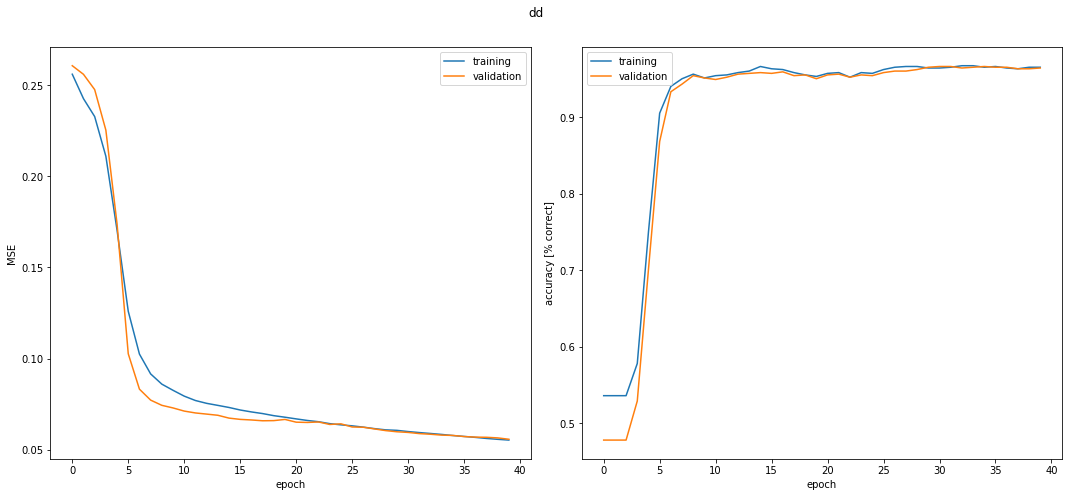

In [20]:
plot_history(history, 'dd');